In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("StudentsPerformance.csv")
df.shape
(1000,8)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


#### 1. Find out how many males and females participated in the test.

In [7]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

#### 2. What do you think about the students' parental level of education?

In [8]:
count = df['parental level of education'].value_counts()

Text(0, 0.5, 'People')

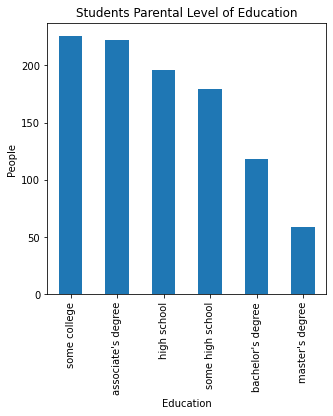

In [13]:
fig = plt.figure(figsize = (5, 5))
count.plot.bar(title='Students Parental Level of Education')
plt.xlabel("Education")
plt.ylabel("People")


### 3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course

In [14]:
cols = ['math score', 'reading score','writing score']

df[cols].groupby(df['gender']).mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [5]:
df[['gender','test preparation course','math score']].groupby(['gender','test preparation course']).agg(['mean','count']).round(1)

math score      
                                     mean count
gender test preparation course                 
female completed                     67.1   184
       none                          61.3   334
male   completed                     73.0   174
       none                          66.5   308

#### 4. What do you think about the scoring variation for math, reading and writing based on
● Gender
● Test preparation course


In [15]:
cols = ['math score', 'reading score','writing score']

df[cols].groupby(df['gender']).var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


In [16]:
cols = ['math score', 'reading score','writing score']

df[cols].groupby(df['test preparation course']).var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


#### 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.


In [17]:
new_df =df.sort_values(by='math score', ascending=False)

In [18]:
n = 25
new_df.head(int(len(new_df)*(n/100)))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73
